# Методы статистического анализа на Python

## Содержание

[1. Общая схема и алгоритм статистического анализа](#1.-Общая-схема-и-алгоритм-статистического-анализа)

[2. Проверка нормальности распределения](#2.-Проверка-нормальности-распределения)
- [Графическое распределение (distplot)](#Графическое-распределение-(distplot))
- [Критерий Колмогорова-Смирнова](#Критерий-Колмогорова-Смирнова)
- [Критерий Шапиро-Уилка](#Критерий-Шапиро-Уилка)
- [qq-plot](#qq-plot)

[3. Описательная статистика](#3.-Описательная-статистика)
- [Мода, медиана и среднее](#Мода,-медиана-и-среднее)
- [Размах, дисперсия и стандартное отклонение](#Размах,-дисперсия-и-стандартное-отклонение)
- [boxplot](#boxplot)
- [Доверительный интервал](#Доверительный-интервал)
- [Стандартизация (Z-преобразование)](#Стандартизация-(Z-преобразование))
- [Стандартная ошибка среднего (SE)](#Стандартная-ошибка-среднего-(SE))

[4. t-критерий Стьюдента для независимых выборок](#4.-t-критерий-Стьюдента-для-независимых-выборок)

[5. Однофакторный дисперсионный анализ (ANOVA)](#5.-Однофакторный-дисперсионный-анализ-(ANOVA))

[6. Многофакторный дисперсионный анализ](#6.-Многофакторный-дисперсионный-анализ)

[7. BOOTSTRAP и критерий Манна-Уитни (в сравнении)](#7.-BOOTSTRAP-и-критерий-Манна-Уитни-(в-сравнении))

[8. Корреляционный анализ](#8.-Корреляционный-анализ)

[9. Регрессионный анализ](#9.-Регрессионный-анализ)
- [Регрессия с одной независимой переменной](#Регрессия-с-одной-независимой-переменной)
- [Множественный регрессионный анализ](#Множественный-регрессионный-анализ)

[10. Кластерный анализ](#10.-Кластерный-анализ)

# 1. Общая схема и алгоритм статистического анализа

<img src="img/scheme.png" width=1100>

## Общий алгоритм

1. Формируется нулевая (H0 - параметр совокупности равен какому-то определённому значению) и альтернативная гипотезы (H1 - не равен).
2. Формируется случайная выборка элементов совокупности и определяются параметры выборки.
3. Преобразуется параметр выборки в статистический критерий.
4. Определяется p-значение для полученного статистического критерия.
5. Сравниваемся с критическим значением статистического критерия.
6. Вывод о сохранении нулевой гипотезы или о подтверждении альтернативной.

Если различие между исследуемыми группами (выборками) заметно выражено относительно величины изменчивости данных, исследователь отвергает нулевую гипотезу и делает вывод, что случайное появление такого результата маловероятно: полученный результат статистически значим.

Возможны два основных вида ошибочных решений: 
1. Ошибка I рода (alpha, уровень достоверности, отвергается истинная нулевая гипотеза. Имеет следствием ошибочное подтверждение гипотезы исследования - ложноположительные результаты).
2. Ошибка II рода (при которой сохраняется ложная нулевая гипотеза. Это неспособность распознать статистически значимый результат - ложно отрицательные результаты).

# 2. Проверка нормальности распределения

## Графическое распределение (distplot)

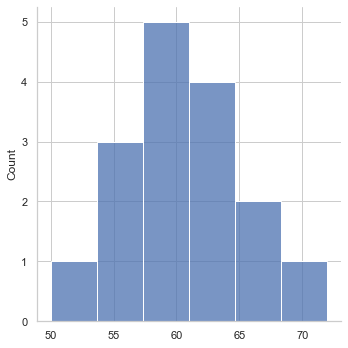

In [114]:
import seaborn as sns
import numpy as np

sample = np.array([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

ax = sns.displot(sample, kde = False)

## Критерий Колмогорова-Смирнова 
(точнее при количестве исследуемых n>50)


## Критерий Шапиро-Уилка 
(точнее при количестве исследуемых n<50).

Нулевая гипотеза (H0) - данные распределены нормально

##### scipy + pandas

In [115]:
from scipy import stats
import pandas as pd

data = pd.DataFrame({'a': [50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72]})

stats.shapiro(data.a)

# в случае большого количества данных используем выборку - sample:
# stats.shapiro(df.column.sample(1000, random_state=17))
# т.к. тест Шапиро-Уилка чувствителен к большим совокупностям.
# Cчитаем, что если ген. совокупность распределена нормально, то и выборки тоже будут нормальными.
# Но тогда прогоняем тест несколько раз, чтобы убедиться в стабильность результатов.
# random_state=17 - для стабилизации расчета p-value при сэмплировании

#p >= 0.05 - нет оснований отклонить H0, данные распределены нормально

ShapiroResult(statistic=0.9803240299224854, pvalue=0.9661158323287964)

##### scipy + numpy

In [116]:
import numpy as np
from scipy import stats

sample = np.array([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

W, p = stats.shapiro(sample)
print("Shapiro-Wilk test, W:", W, "p-value:", p)

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Shapiro-Wilk test, W: 0.9803240299224854 p-value: 0.9661158323287964
Принять гипотезу о нормальности


## qq-plot

##### scipy

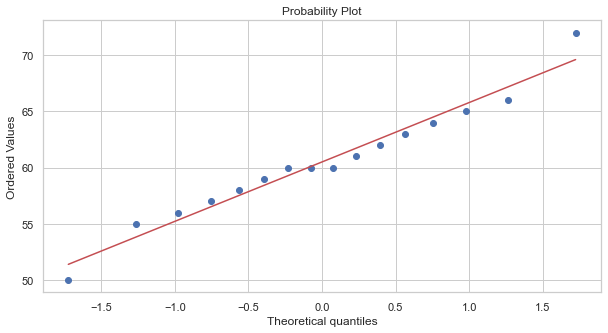

In [117]:
import numpy as np 
import pylab 
import scipy.stats as stats

sample = np.array([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

stats.probplot(sample, dist="norm", plot=pylab)
pylab.show()

##### pingouin

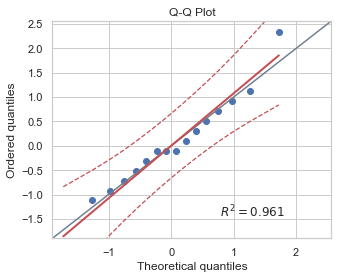

In [118]:
import pingouin as pg

sample = np.array([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

ax = pg.qqplot(sample, dist='norm')

# 3. Описательная статистика

## Мода, медиана и среднее

In [119]:
import numpy as np
from scipy import stats

sample = np.array([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

print('mode:', stats.mode(sample))
print('median:', np.median(sample))
print('mean:', np.mean(sample))

mode: ModeResult(mode=array([60]), count=array([3]))
median: 60.0
mean: 60.5


In [120]:
import pandas as pd

sample = pd.Series([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

print('mode:', sample.mode())
print('median:', sample.median())
print('mean:', sample.mean())

mode: 0    60
dtype: int64
median: 60.0
mean: 60.5


In [121]:
import pandas as pd

sample = pd.Series([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

sample.describe()

count    16.000000
mean     60.500000
std       5.072803
min      50.000000
25%      57.750000
50%      60.000000
75%      63.250000
max      72.000000
dtype: float64

## Размах, дисперсия и стандартное отклонение

In [122]:
import numpy as np
import pandas as pd

sample = np.array([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

# размах -  разность между max и min значением из распределения
range = np.max(sample)- np.min(sample)
print(f'range = {range}')

range_2 = np.percentile(sample, [0, 100])
print(f'range(other count way) = {range_2}')

# дисперсия - средний квадрат отклонений индивидуальных значений признака от их средней величины
D = np.var(sample)
print(f'D = {D}')
# или df.A.var() , если через pandas

# cреднеквадратическое (стандартное) отклонение - корень из дисперсии
sd = np.std(sample, ddof=1)
print(f'sd = {sd}')
# или df.A.std() , если через pandas

range = 22
range(other count way) = [50. 72.]
D = 24.125
sd = 5.072803301265814


## boxplot

/home/at/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/at/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


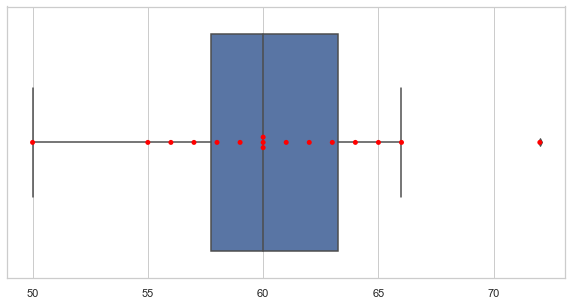

In [123]:
import seaborn as sns

sample = np.array([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

ax = sns.boxplot(sample)
ax = sns.swarmplot(sample, color = 'Red') # дополнительное наложение точек

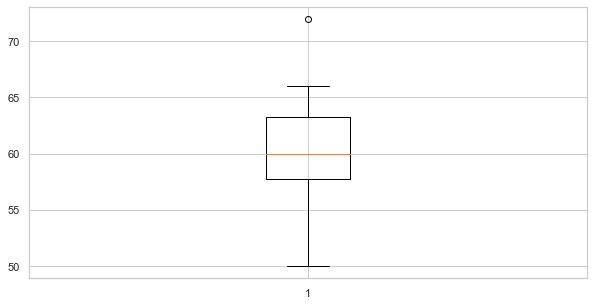

In [124]:
import matplotlib.pyplot as plt

sample = np.array([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

plt.boxplot(sample, showfliers=1)
plt.show()

## Доверительный интервал
среднее значение генеральной совокупности принадлежит рассчитанному доверительному интервалу с заданной вероятностью (например, 95%)

95% - μ±1.96se; 99% - μ±2.58se

##### statsmodels or scipy

In [125]:
import numpy as np, scipy.stats as st
import statsmodels.stats.api as sms

sample = np.array([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

# первый способ
print(st.t.interval(0.95, len(sample)-1, loc=np.mean(sample), scale=st.sem(sample)))
# второй способ
print(sms.DescrStatsW(sample).tconfint_mean())

(57.79689392720129, 63.20310607279871)
(57.79689392720129, 63.20310607279871)


##### по формулам и известны меры центральной тенденции и меры изменчивости

In [126]:
from numpy import sqrt
from scipy import stats

p = 0.95  # % интервала
mean = 60.5
std = 5.072803301265814
n = 16

se = std/sqrt(n)
alpha = (1-p)/2
sigma = stats.norm().isf(alpha)
сonf_interval = mean - sigma*se, mean + sigma*se

print(сonf_interval)

(58.01437205721578, 62.98562794278422)


## Стандартизация (Z-преобразование)
преобразование, которое позволяет любую шкалу перевести в стандартную Z-шкалу (Z-scores), где среднее значение будет равно нулю, а стандартное отклонение – 1. Форма распределения при этом не изменится.

In [127]:
from scipy.stats import zscore

sample = np.array([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

zscore(sample)

array([-2.13774371, -1.11977052, -0.91617588, -0.71258124, -0.5089866 ,
       -0.30539196, -0.10179732, -0.10179732, -0.10179732,  0.10179732,
        0.30539196,  0.5089866 ,  0.71258124,  0.91617588,  1.11977052,
        2.34133835])

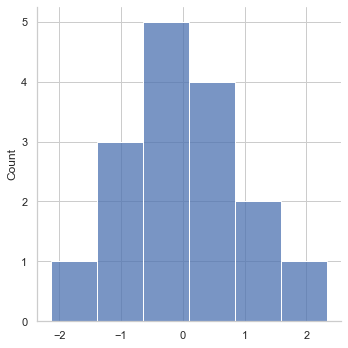

In [128]:
import seaborn as sns

ax = sns.displot(zscore(sample), kde = False)

## Стандартная ошибка среднего (SE)
показывает, насколько выборочное среднее отличается от среднего генеральной совокупности. SE при увеличении размера выборки будет стремиться к нулю.

In [129]:
# import pandas as pd
# df.A.sem()

# from scipy import stats
# stats.sem(df.A)

# 4. t-критерий Стьюдента для независимых выборок
t-критерий Стьюдента используется для определения статистической значимости различий средних величин.
Н0 - статзначимых различий нет.

Если pvalue >= 0.05, НЕ можем отклонить нулевую гипотезу, т.е. значимых различий нет.

Если pvalue < 0.05, можем отклонить нулевую гипотезу, т.е. группы значимо различаются.

##### scipy 

In [130]:
# по колонкам датафрейма 

import pandas as pd
from scipy import stats

data = pd.DataFrame({
           'a': [3, 1, 2],
           'b': [5, 3, 4]})

stats.ttest_ind(data.a, data.b)

Ttest_indResult(statistic=-2.449489742783178, pvalue=0.07048399691021993)

##### pingouin

In [131]:
# нужно переменным присвоить колонки

import pingouin as pg

data = pd.DataFrame({
           'a': [3, 1, 2],
           'b': [5, 3, 4]})

aa = data.a
bb = data.b

pg.ttest(aa, bb)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.44949,4,two-sided,0.070484,"[-4.27, 0.27]",2.0,1.654,0.462641


##### по формулам, если известны меры центральной тенденции и меры изменчивости

In [132]:

from scipy.stats import t
from numpy import sqrt

mean_1 = 45
mean_2 = 44
sd_1 = 3
sd_2= 4
n1= 50
n2 = 50

se = sqrt((sd_1 ** 2)/n1 + (sd_2 ** 2)/n2)
t_value = (mean_1 - mean_2)/se
print(f't_value = {t_value}')

p = t.sf(t_value, n1+n2-2)
print(f'p = {p}')

if p >= 0.05:
    print('p >= 0.05, НЕ можем отклонить нулевую гипотезу')
else:
    print('p < 0.05, можем отклонить нулевую гипотезу')

t_value = 1.414213562373095
p = 0.08023418166343646
p >= 0.05, НЕ можем отклонить нулевую гипотезу


# 5. Однофакторный дисперсионный анализ (ANOVA)
анализ для двух или нескольких независимых групп, когда все группы объединены по одному признаку. В ходе анализа проверяется нулевая гипотеза о равенстве средних.

#### 1.Проверяем, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена (H0 - дисперсии гомогенны).

In [133]:
import pandas as pd
import scipy.stats as stats

data = pd.DataFrame({
           'a': [3, 1, 2],
           'b': [5, 3, 4],
           'c': [7, 6, 5]})
aa = data.a
bb = data.b
cc = data.c

stats.levene(aa, bb, cc)

# pvalue >= 0.05 - дисперсии гомогенны
# pvalue < 0.05 - дисперсии разные

LeveneResult(statistic=0.0, pvalue=1.0)

если дисперсии разные, можно сделать дисперсионный анализ Уэлча (см. п.5)

#### 2. Проверяем нормальность распределения (Шапиро-Уилка).
#### 3. Проводим сам тест (дисперсионный анализ).

###### scipy

In [134]:
from scipy import stats

stats.f_oneway(aa, bb, cc)

# pvalue >= 0.05 - значимых различий между группами нет
# pvalue < 0.05 - значимые различия между группами есть

F_onewayResult(statistic=12.0, pvalue=0.008000000000000002)

##### pingouin

In [138]:
# для него нужно преобразовать датафрейм data к формату двух колонок

#data1 = pd.DataFrame({'c1':np.repeat(data.columns,len(data)),
#                  'c2':data.to_numpy().transpose().flatten()})

# более простой вариант кода выше:

data1 = data.melt()

In [139]:
data1

,variable,value
0,a,3
1,a,1
2,a,2
3,b,5
4,b,3
5,b,4
6,c,7
7,c,6
8,c,5


In [143]:
# переименуем кололнки для удобства

data1.rename(columns = {'variable' : 'c1', 'value' : 'c2'}, inplace = True) 

In [144]:
import pingouin as pg

pg.anova(data = data1, dv = 'c2', between = 'c1')

,Source,ddof1,ddof2,F,p-unc,np2
0,c1,2,6,12.0,0.008,0.8


In [145]:
# здесть F - F-values (то же, что statistic в stats); p-unc - pvalue

#### 4. Определим, между какими группами есть статистически значимые различия с помощью критерия Тьюки

In [146]:
# также работаем с преобразованным data1

##### statsmodels

In [147]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

pairwise_tukeyhsd(data1.c2, data1.c1).summary()

# reject = True - H0 отклоняется (т.е. между группам статзначимые различия есть)
# reject = False - H0 принимается

group1,group2,meandiff,p-adj,lower,upper,reject
a,b,2.0,0.1089,-0.5052,4.5052,False
a,c,4.0,0.0065,1.4948,6.5052,True
b,c,2.0,0.1089,-0.5052,4.5052,False


##### pingouin

In [148]:
import pingouin as pg

pg.pairwise_tukey(data = data1, dv = 'c2', between = 'c1')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,a,b,2.0,4.0,-2.0,0.816497,-2.449490,0.108867,-1.6
1,a,c,2.0,6.0,-4.0,0.816497,-4.898979,0.006494,-3.2
2,b,c,4.0,6.0,-2.0,0.816497,-2.449490,0.108867,-1.6


<AxesSubplot:>

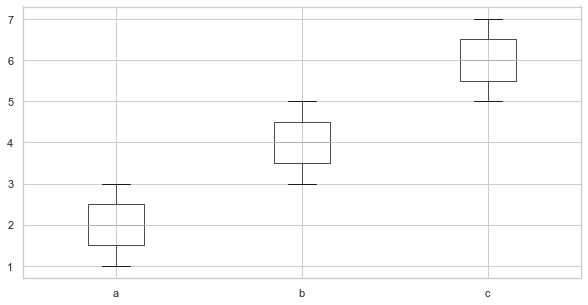

In [149]:
# ну и можно посмотреть на взаимное расположение боксплотов

data = pd.DataFrame({
           'a': [3, 1, 2],
           'b': [5, 3, 4],
           'c': [7, 6, 5]})
data.boxplot()

#### 5. Дисперсионный анализ Уэлча

In [150]:
# import pingouin as pg
# pg.welch_anova(data=данные, dv="зависимая_переменная", between="независимая_переменная")

### Дисперсионный анализ по формулам

In [152]:
from scipy import stats
import pandas as pd

data = pd.DataFrame({
           'a': [3, 1, 2],
           'b': [5, 3, 4],
           'c': [7, 6, 5]})
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!({"=".join(data)})')
# общая средняя
grand_mean = data.values.flatten().mean()
# отклонение групповых средний от общей средней
ssb = sum(data[group].size * (group_mean - grand_mean)**2  for group, group_mean in data.mean().items())
# отклонения значений в внутри группы от средней группы
ssw = sum(sum((x - group_mean)**2 for x in data[group]) for group, group_mean in data.mean().items())

groups = data.shape[1]
dfb = groups - 1
dfw = data.size - groups
# межгрупповой средний квадрат  
mssb = ssb/dfb
# внутригрупповой средний квадрат
mssw = ssw/dfw

f_value = mssb/mssw

p = stats.f.sf(f_value, dfb, dfw)
print(f'p = {p}')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

Нулевая гипотеза: a=b=c
Альтернативная гипотеза: !(a=b=c)
p = 0.008000000000000002
отклоняем нулевую гипотезу


# 6. Многофакторный дисперсионный анализ
позволяет проверить влияние нескольких факторов на зависимую переменную.

### Двухфакторный дисперсионный анализ (two-way ANOVA)

In [153]:
import pandas as pd

data2 = pd.DataFrame({
           'c1': ['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c'],
           'c2': ['high', 'low', 'low','high', 'low', 'low', 'high', 'low', 'low'],
           'c3': [3, 2, 1, 5, 3, 4, 7, 6, 5]})

#### 1. Определяем формулу для модели в statsmodels:
"зависимая переменная ~ незав.перем.1 + незав.перем.2 + взаимодействие 1 и 2"

#### 2. Проводим анализ

##### statsmodels

In [154]:
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm


model = smf.ols(formula = 'c3 ~ c1 + c2 + c1:c2', data = data2).fit()
aov_table = anova_lm(model, typ=2)

In [155]:
print(round(aov_table, 5))

# смотрим на PR(>F) - это pvalue.
# pvalue < 0.05 - влияние фактора значимо.
# В данном случае значимо влияет только фактор c1

          sum_sq   df     F   PR(>F)
c1          24.0  2.0  24.0  0.01427
c2           4.5  1.0   9.0  0.05767
c1:c2        0.0  2.0   0.0  1.00000
Residual     1.5  3.0   NaN      NaN


##### pingouin

In [156]:
import pingouin as pg

pg.anova(data = data2, dv = 'c3', between = ['c1', 'c2'])

,Source,SS,DF,MS,F,p-unc,np2
0,c1,2.400000e+01,2.0,1.200000e+01,2.400000e+01,0.014267,9.411765e-01
1,c2,4.500000e+00,1.0,4.500000e+00,9.000000e+00,0.057669,7.500000e-01
2,c1 * c2,4.996119e-30,2.0,2.498060e-30,4.996119e-30,1.000000,3.330746e-30
3,Residual,1.500000e+00,3.0,5.000000e-01,NaN,NaN,NaN


#### 3. С помощью критерия Тьюки смотрим, между какими группами есть статистически значимые различия

In [157]:
# для этого сначала в дф добавляем колонку "взаимодействие 1 и 2" (с1\с2)

data2['combination'] = data2.c1 + " \ " + data2.c2
data2

,c1,c2,c3,combination
0,a,high,3,a \ high
1,a,low,2,a \ low
2,a,low,1,a \ low
3,b,high,5,b \ high
4,b,low,3,b \ low
5,b,low,4,b \ low
6,c,high,7,c \ high
7,c,low,6,c \ low
8,c,low,5,c \ low


##### statsmodels

In [158]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

pairwise_tukeyhsd(data2.c3, groups = data2.combination).summary()

# reject = False - H0 принимается (т.е. между группам статзначимые различия есть)
# reject = True - H0 отклоняется

group1,group2,meandiff,p-adj,lower,upper,reject
a \ high,a \ low,-1.5,0.5923,-6.4217,3.4217,False
a \ high,b \ high,2.0,0.49,-3.6831,7.6831,False
a \ high,b \ low,0.5,0.9859,-4.4217,5.4217,False
a \ high,c \ high,4.0,0.1235,-1.6831,9.6831,False
a \ high,c \ low,2.5,0.2573,-2.4217,7.4217,False
a \ low,b \ high,3.5,0.1205,-1.4217,8.4217,False
a \ low,b \ low,2.0,0.2682,-2.0185,6.0185,False
a \ low,c \ high,5.5,0.0369,0.5783,10.4217,True
a \ low,c \ low,4.0,0.0506,-0.0185,8.0185,False
b \ high,b \ low,-1.5,0.5923,-6.4217,3.4217,False


##### pingouin

In [159]:
import pingouin as pg

pg.pairwise_tukey(data = data2, dv = 'c3', between = 'combination')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,a \ high,a \ low,3.0,1.5,1.5,0.866025,1.732051,0.592260,0.000000
1,a \ high,b \ high,3.0,5.0,-2.0,1.000000,-2.000000,0.490030,-11.313708
2,a \ high,b \ low,3.0,3.5,-0.5,0.866025,-0.577350,0.985935,-0.000000
3,a \ high,c \ high,3.0,7.0,-4.0,1.000000,-4.000000,0.123541,-22.627417
4,a \ high,c \ low,3.0,5.5,-2.5,0.866025,-2.886751,0.257340,-0.000000
5,a \ low,b \ high,1.5,5.0,-3.5,0.866025,-4.041452,0.120476,-0.000000
6,a \ low,b \ low,1.5,3.5,-2.0,0.707107,-2.828427,0.268217,-1.616244
7,a \ low,c \ high,1.5,7.0,-5.5,0.866025,-6.350853,0.036941,-0.000000
8,a \ low,c \ low,1.5,5.5,-4.0,0.707107,-5.656854,0.050627,-3.232488
9,b \ high,b \ low,5.0,3.5,1.5,0.866025,1.732051,0.592260,0.000000


##### визуализация

<AxesSubplot:xlabel='c1', ylabel='c3'>

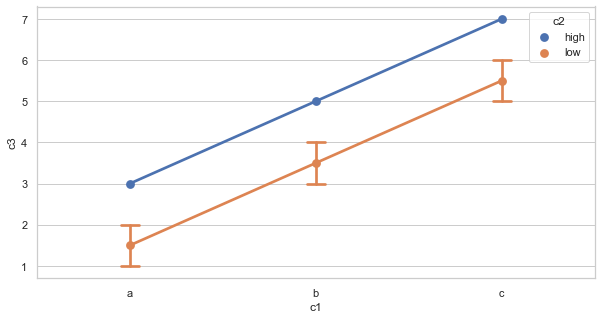

In [160]:
sns.pointplot(x = 'c1', y = 'c3', hue = 'c2', data = data2, capsize = .1)
#plt.xlabel('...')
#plt.ylabel('...')

<AxesSubplot:xlabel='c1', ylabel='c3'>

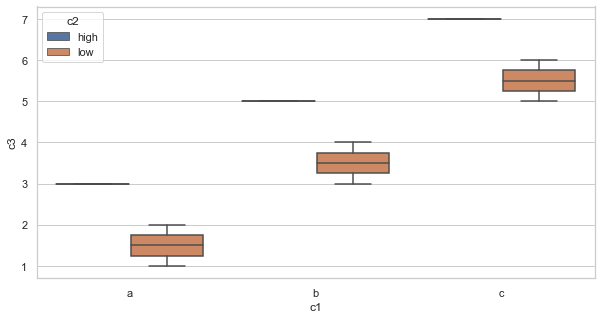

In [161]:
sns.boxplot(x = 'c1', y = 'c3', hue = 'c2', data = data2)
#plt.xlabel('...')
#plt.ylabel('...')

# 7. BOOTSTRAP и критерий Манна-Уитни (в сравнении)

BOOTSTRAP - метод, позволяющий проверять гипотезы с помощью повторных подвыборок из выборки, полученной в рамках эксперимента (например, A/B теста).

В полученных подвыборках считаются статистики (среднее, медиана и т.п.), можно получить распределение и взять доверительный интервал.

### Функция для расчета p_value и доверительного интервала с помощью бутстрапа

In [109]:
import numpy as np
import pandas as pd
from scipy.stats import norm, mannwhitneyu
import matplotlib.pyplot as plt

In [111]:
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boots = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика, по умолчанию - среднее
    bootstrap_conf_level = 0.95 # уровень значимости
):
    
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in range(boots): # извлекаем подвыборки
        samples_1 = data_column_1.sample(boot_len, replace = True).values
        samples_2 = data_column_2.sample(boot_len, replace = True).values
        
        boot_data.append(statistic(samples_1-samples_2))
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant]) # доверительный интервал

# Есть выборка бутстрапированной разницы. В случае, если в первой группе всё так же, 
# как и во второй, эта выборка должна быть нормально распределенной и с нулевым средним. 
# В norm.cdf берём среднее x=0 (опять же, из соображений одинаковости средних), 
# а стандартное отклонение — равное 1, потому что применяется правило 3-х сигм. 
# Таким образом, считаем вероятность отклониться от нуля в центре по нормальному 
# распределению со стандартным отклонением, равным 1.
    
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
   
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

Запустим функцию на датафрейме, где есть два варианта колонки experimentVariant: Control и Treatment и непрерывная переменная value. Нам нужно сравнить как раз группы Control и Treatment.

In [106]:
# импорт датафрейма
bootstrap_df = pd.read_csv('./dataframes/bootstrap.csv', decimal = ',', sep=';')
bootstrap_df.head()

,Unnamed: 0,value,experimentVariant
0,1,10.380495,Control
1,2,9.546867,Control
2,3,11.088215,Control
3,4,10.147274,Control
4,5,9.789808,Control


In [112]:
# создадим таблицу для итоговых зачений
result_table = pd.DataFrame(columns = ['boot_mean','boot_median', 'Mann–Whitney'])

x = bootstrap_df.query('experimentVariant == "Control"').value # подвыборка 1
y = bootstrap_df.query('experimentVariant == "Treatment"').value # подвыборка 2

res_MW = mannwhitneyu(x, y, alternative = 'two-sided') # результат расчета по Манна-Уитни

# запустим расчет 5 раз, посмотрим на повторяемость результатов

for i in range(5):
    res_boot_npmean = get_bootstrap(x, y)
    res_boot_npmedian = get_bootstrap(x, y, statistic = np.median) # меняем рассчитываемую статистику на медиану
    
    #наполняем таблицу в каждом шаге цикла
    result_table.loc[i, 'boot_mean'] = res_boot_npmean["p_value"]
    result_table.loc[i, 'boot_median'] = res_boot_npmedian["p_value"]
    result_table.loc[i, 'Mann–Whitney'] = res_MW.pvalue

In [113]:
 result_table

,boot_mean,boot_median,Mann–Whitney
0,0.032304,0.877084,0.859215
1,0.040413,0.822406,0.859215
2,0.039319,0.885131,0.859215
3,0.038407,0.910676,0.859215
4,0.039353,0.892564,0.859215


#####  ВЫВОДЫ из таблицы:  
1. p_value медиан по бустрапу и по Манну-Уитни близки (что логично, т.к. Манн-Уитни проверяет, есть ли разница между распределениями при рассмотрении их в ранговой системе). Стоит понимать, что бустрап более предпочтителен, т.к. в отличие от Манна-Уитни сохраняется дисперсия оригинальной выборки, т.е. учитывается дисбаланс выборок.
2. Значения p_value по средним < 0,05, а значит нулевую гипотезу о равенстве средних в выборках 1 и 2 можно отвергнуть.
3. Значения p_value по медианам > 0,05, а значит нулевую гипотезу о равенстве медиан в выборках 1 и 2 можно принять.

##### применим функцию для одного расчета по медианам и визуализируем

In [114]:
x = bootstrap_df.query('experimentVariant == "Control"').value # подвыборка 1
y = bootstrap_df.query('experimentVariant == "Treatment"').value # подвыборка 2
res_boot_npmedian2 = get_bootstrap(x, y, statistic = np.median)

In [95]:
# вызов p_value
res_boot_npmedian2["p_value"]

0.8454987695173027

In [115]:
# вызов доверительного интервала
res_boot_npmedian2["ci"]

,0
0.025,-0.159558
0.975,0.138744


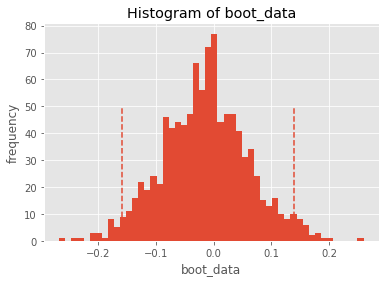

In [121]:
# гистограмма с отмеченным ДИ
plt.hist(res_boot_npmedian2['boot_data'], bins = 50)
    
plt.style.use('ggplot')
plt.vlines(res_boot_npmedian2['ci'],ymin=0,ymax=50,linestyle='--')
plt.xlabel('boot_data')
plt.ylabel('frequency')
plt.title("Histogram of boot_data")
plt.show()

### Готовая библиотека для boostrap

https://pypi.org/project/bootstrapped/

# 8. Корреляционный анализ

### Коэффициенты корреляции Пирсона, Спирмена и Кэндалла

позволяют определить наличие или отсутствие линейной связи между двумя количественными показателями, а также оценить ее тесноту и статистическую значимость. Критерий корреляции Пирсона позволяет определить, изменяется ли (возрастает или уменьшается) один показатель в ответ на изменения другого.

Значения коэффициента корреляции Пирсона интерпретируются исходя из его абсолютных значений. Возможные значения коэффициента корреляции варьируют от 0 до ±1. Чем больше абсолютное значение rxy – тем выше теснота связи между двумя величинами. rxy = 0 говорит о полном отсутствии связи. rxy = 1 – свидетельствует о наличии абсолютной (функциональной) связи. Если значение критерия корреляции Пирсона оказалось больше 1 или меньше -1 – в расчетах допущена ошибка.

Оценка силы корреляционной связи определяется по таблице Чеддока:
<img src="img/chaddock_table.png" width=450>

Условия применения коэффициента Пирсона:

1. Связь линейна и монотонна (нарастает или убывает в одном направлении, не меняя его)
2. Отсутствуют выбросы
3. Переменные нормально распределены

В случае нарушения этих допущений могут быть полезны коэффициенты корреляции Спирмена и Кэндалла, которые вместо реальных значений анализируют их ранги. Им нужна монотонная взаимосвязь, которая необязательно похожа на прямую линию, но тренд которой не меняется.

Нелинейный аналог коэф.корреляции https://minepy.readthedocs.io/en/latest/python.html

##### numpy

In [162]:
import numpy as np

list1 = [1, 2, 3, 4, 5]
list2 = [4, 6, 8, 10, 12]

np.corrcoef(list1, list2)[0, 1]

0.9999999999999999

In [163]:
np.corrcoef(list1, list2)

array([[1., 1.],
       [1., 1.]])

##### scipy

In [164]:
import scipy.stats as st

list1 = [1, 2, 3, 4, 5]
list2 = [4, 6, 8, 10, 12]

print('Pearson', st.pearsonr(list1, list2))
print ('Spearman', st.spearmanr(list1, list2))
print('Kendall', st.kendalltau(list1, list2) )

Pearson (1.0, 0.0)
Spearman SpearmanrResult(correlation=0.9999999999999999, pvalue=1.4042654220543672e-24)
Kendall KendalltauResult(correlation=0.9999999999999999, pvalue=0.016666666666666666)


##### scipy + pandas

In [165]:
import scipy.stats as st
import pandas as pd

data = {'list1':[1, 2, 3, 4, 5],'list2':[4, 6, 8, 10, 12]}
df = pd.DataFrame(data, columns = ['list1','list2'])


df.corr()

,list1,list2
list1,1.0,1.0
list2,1.0,1.0


In [166]:
df.corr(method='spearman')

,list1,list2
list1,1.0,1.0
list2,1.0,1.0


In [167]:
df.corr(method='kendall')

,list1,list2
list1,1.0,1.0
list2,1.0,1.0


# 9. Регрессионный анализ

## Регрессия с одной независимой переменной
Задача одномерной линейной регрессии та же, что и у коэффициента корреляции – оценить взаимосвязь между двумя количественными переменными. В линейной регрессии более чётко выражено, какая переменная независимая (НП), а какая зависимая (ЗП).

Условия применения
1. Связь линейна и монотонна 
2. Остатки распределены нормальным образом
3. Нет выбросов 
4. Дисперсия ЗП однородна на всех уровнях НП (гомоскедастичность)

Основное уравнение линейной регрессии:

Y = b0 + b1*X + ϵ

b0 – свободный член регрессионного уравнения (Intercept), место, где регрессионная прямая пересекает ось Y (какое значение принимает зависимая переменная, если независимая переменная равна нулю);
b1 – угол наклона регрессионной прямой (slope) (jтражает направление взаимосвязи между НП и ЗП);
ϵ – ошибка (остатки уравнения регрессии)

##### scipy linregress

In [168]:
from scipy.stats import linregress

list1 = [1, 2, 3, 4, 5]
list2 = [4, 6, 8, 10, 12]

linregress(list1, list2)
#also works with a two-row pandas.DataFrame: lineregress(two_row_df)

LinregressResult(slope=2.0, intercept=2.0, rvalue=1.0, pvalue=1.2004217548761408e-30, stderr=0.0, intercept_stderr=0.0)

##### statsmodels var.1
 list2= одномерный массив с зависимой переменной, list1- массив с НП

In [170]:
import statsmodels.formula.api as smf
import pandas as pd

data = {'list1':[1, 2, 3, 4, 5],'list2':[4, 6, 8, 10, 12]}
df = pd.DataFrame(data, columns = ['list1','list2'])

results = smf.ols('list2 ~ list1', data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  list2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.042e+31
Date:                Fri, 19 Aug 2022   Prob (F-statistic):           1.31e-47
Time:                        16:10:51   Log-Likelihood:                 166.19
No. Observations:                   5   AIC:                            -328.4
Df Residuals:                       3   BIC:                            -329.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0000    1.2e-15   1.66e+15      0.0

/home/at/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Intercept - это свободный член (b0); list1 - НП; coef – значение коэффициента ('-' - отрицательная взаимосвязь, '+' - положительная); std err – стандартная ошибка; t – t-критерий; P > |t| – p-vaplue

R^2 - коэффициент детерминации, квадрат коэффициента корреляции Пирсона (отображает, в какой степени дисперсия одной переменной обусловлена влиянием другой переменной).

##### statsmodels var.2 (с построением модели)

In [171]:
from scipy import stats
import statsmodels.api as sm

# list2 = одномерный массив с ЗП, list1 - массив с НП

list1 = [1, 2, 3, 4, 5]
list2 = [4, 6, 8, 10, 12]

list1 = sm.add_constant(list1)  # добавить константу, чтобы был свободный член
model = sm.OLS(list2, list1)  # говорим модели, что у нас ЗП, а что НП
results = model.fit()  # строим регрессионную прямую
print(results.summary())  # смотрим результат

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.042e+31
Date:                Fri, 19 Aug 2022   Prob (F-statistic):           1.31e-47
Time:                        16:10:55   Log-Likelihood:                 166.19
No. Observations:                   5   AIC:                            -328.4
Df Residuals:                       3   BIC:                            -329.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0000    1.2e-15   1.66e+15      0.0

/home/at/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


##### visualisation

<AxesSubplot:xlabel='list1', ylabel='list2'>

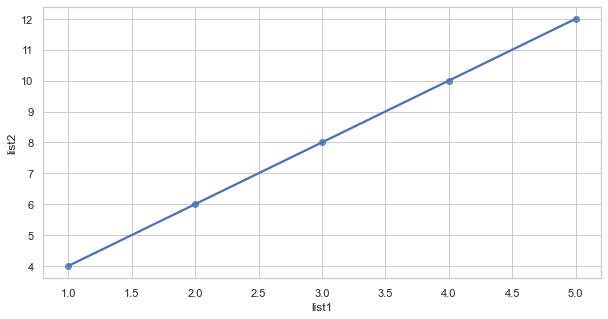

In [173]:
import seaborn as sns

sns.set(style='whitegrid', rc={'figure.figsize' : (10,5)}) 
sns.regplot(x = 'list1', y = 'list2', data = df)
# plt.title('')
# plt.xlabel('')
# plt.ylabel('')

### Предсказание значений
строим регерссионную модель аналогично предыдущему пункту -> применяем model.predict(X), где X - массив со значениями НП, model - построенная регрессионная модель

In [174]:
from scipy import stats
import statsmodels.api as sm

# list2 = одномерный массив с ЗП, list1 - массив с НП

list1 = [1, 2, 3, 4, 5]
list2 = [4, 6, 8, 10, 12]

list1 = sm.add_constant(list1)  # добавить константу, чтобы был свободный член
model = sm.OLS(list2, list1)  # говорим модели, что у нас ЗП, а что НП
results = model.fit()  # строим регрессионную прямую

results.predict(list1) # вызываем предикт

array([ 4.,  6.,  8., 10., 12.])

## Множественный регрессионный анализ


#### Логистическая регрессия
расширение классической линейной регрессии, заточенное под анализ связи независимой переменной и бинарной зависимой (переменной с двумя градациями). Можно взглянуть на логистическую регрессию как на t-критерий наоборот (в t-критерии мы проверяем, как две группы различают|я по одной количественной переменной, а в логистической регрессии мы проверяем, как одна или несколько количественных переменных влияют на возникновение одной или другой группы)

In [232]:
data = {'list1':[1, 2, 3, 4, 5, 6],'list2':[4, 6, 8, 10, 12, 14], 'list3':[0, 1, 0, 1, 0, 1]}

# list1 и list2 - НП
# list3 - ЗП (должна принмать значения 0 или 1 (это две группы, на которые она разделена))

In [233]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

# Y = одномерный массив с ЗП, X - массив со всеми нужными нам НП
# results = smf.logit('Y ~ X1 + X2 + ... + Xn', data).fit()

results = smf.logit('list3 ~ list1 + list2', data).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.649169
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  list3   No. Observations:                    6
Model:                          Logit   Df Residuals:                        3
Method:                           MLE   Df Model:                            2
Date:                Fri, 19 Aug 2022   Pseudo R-squ.:                 0.06345
Time:                        18:27:18   Log-Likelihood:                -3.8950
converged:                       True   LL-Null:                       -4.1589
Covariance Type:            nonrobust   LLR p-value:                    0.7681
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8632   1.54e+07  -5.59e-08      1.000   -3.03e+07    3.03e+07
list1          0.7628   1.54e

В данном случае смотрим на Pseudo R-squ (это аналог R^2 для логстических моделей) - чем он больше, тем лучше.

#### Диаграмма корреляции между всеми переменными в анализе
используется для анализа регрессионной модели (с целью ее оптимизации и удаления лишних переменных).

Необходимо помнить, что если независимые переменные сильно коррелируют друг с другом, это может ухудшить анализ, поэтому лишние переменные желательно исключить, чтобы избежать мультиколлинеарности.

В приведенном ниже примере видно, что переменная female_house коррелирует с другими независимыми переменными, таким образом ухудшая анализ.

Можно попробовать поудалять разные НП из модели и посмотреть, как изменится исправленный коэф. детерминации (adj.R^2)

In [177]:
import pandas as pd

df = pd.read_csv('./dataframes/states.csv')
df.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


#### visualization var.1

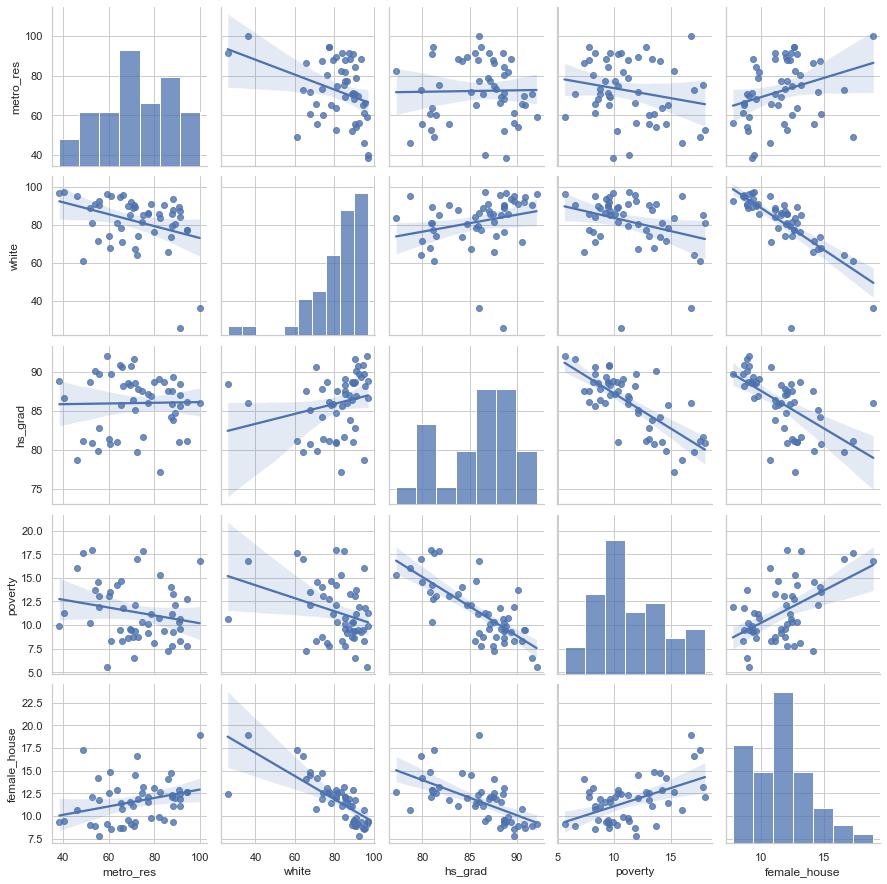

In [180]:
import seaborn as sns

sns.pairplot(df, kind = 'reg')

#### visualization var.2

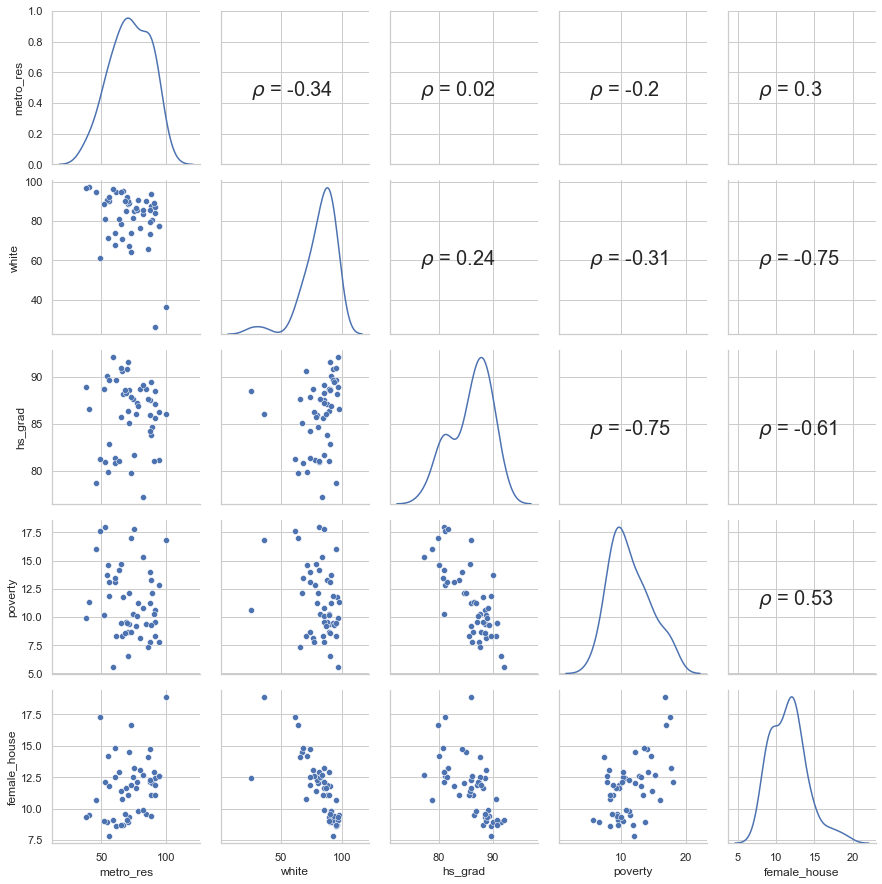

In [178]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.45), size = 20, xycoords = ax.transAxes)

g = sns.PairGrid(df, diag_sharey=False)
# g.map_upper(sns.scatterplot)
g.map_upper(corr)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)

# 10. Кластерный анализ
позволяет объединять переменные на группы по признаку (по схожести). Деление на кластеры удобно для снижения размерности.

In [234]:
# from sklearn.cluster import AgglomerativeClustering

# clustering = AgglomerativeClustering().fit(X)